In [2]:
from ultralytics import YOLO
import cv2
import numpy as np
import torch

In [3]:
model2= YOLO('runs/detect/train7222/weights/best.pt')

In [10]:
import cv2

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model2.predict(frame) 

    for result in results:
        boxes = result.boxes.xyxy  
        scores = result.boxes.conf 
        class_indices = result.boxes.cls  
        labels = result.names 
        
        for i in range(boxes.shape[0]):
            box = boxes[i].cpu().numpy().astype(int) 
            score = scores[i].item()
            class_index = int(class_indices[i].item())  
            class_name = labels[class_index]
            pt1 = (box[0], box[1])  
            pt2 = (box[2], box[3])  
            color = (0, 255, 0)
            thickness = 2  
            frame = cv2.rectangle(frame, pt1, pt2, color, thickness)
            label = f'{class_name} {score:.2f}'
            frame = cv2.putText(frame, label, (pt1[0], pt1[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)

    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



0: 480x640 1 With Helmet, 348.0ms
Speed: 17.2ms preprocess, 348.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 With Helmet, 312.8ms
Speed: 7.1ms preprocess, 312.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 336.7ms
Speed: 4.7ms preprocess, 336.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 With Helmet, 326.8ms
Speed: 3.0ms preprocess, 326.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 335.7ms
Speed: 5.3ms preprocess, 335.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 306.6ms
Speed: 7.9ms preprocess, 306.6ms inference, 7.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 340.3ms
Speed: 4.7ms preprocess, 340.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 380.2ms
Speed: 5.4ms preprocess

In [8]:
import cv2

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    results = model2.predict(frame)

    for result in results:
        boxes = result.boxes.xyxy  
        scores = result.boxes.conf  
        class_indices = result.boxes.cls 
        labels = result.names

        for i in range(boxes.shape[0]):
            score = scores[i].item()
            if score > 0.50:
                box = boxes[i].cpu().numpy().astype(int)
                class_index = int(class_indices[i].item())
                class_name = labels[class_index]
                pt1 = (box[0], box[1])  
                pt2 = (box[2], box[3])  
                color = (0, 255, 0) 
                thickness = 2 
                frame = cv2.rectangle(frame, pt1, pt2, color, thickness)
                label = f'{class_name} {score:.2f}'
                frame = cv2.putText(frame, label, (pt1[0], pt1[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



0: 480x640 1 With Helmet, 331.1ms
Speed: 11.7ms preprocess, 331.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 With Helmet, 1 Without Helmet, 362.2ms
Speed: 6.2ms preprocess, 362.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 With Helmet, 1 Without Helmet, 288.2ms
Speed: 3.9ms preprocess, 288.2ms inference, 7.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 With Helmet, 334.5ms
Speed: 6.0ms preprocess, 334.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 With Helmet, 1 Without Helmet, 269.0ms
Speed: 6.5ms preprocess, 269.0ms inference, 6.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 With Helmet, 285.6ms
Speed: 4.9ms preprocess, 285.6ms inference, 4.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 With Helmet, 269.6ms
Speed: 4.3ms preprocess, 269.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 

In [7]:
import cv2

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    results = model2.predict(frame)

    for result in results:
        boxes = result.boxes.xyxy  
        scores = result.boxes.conf  
        class_indices = result.boxes.cls 
        labels = result.names

        for i in range(boxes.shape[0]):
            score = scores[i].item()
            box = boxes[i].cpu().numpy().astype(int)
            class_index = int(class_indices[i].item())
            class_name = labels[class_index]
            pt1 = (box[0], box[1])  
            pt2 = (box[2], box[3])  

            if score > 0.70:
                color = (0, 255, 0)  # Green for Helmet
                label = f'{class_name} {score:.2f}'
            else:
                color = (0, 0, 255)  # Red for Not Helmet
                label = 'Not Helmet'

            thickness = 2 
            frame = cv2.rectangle(frame, pt1, pt2, color, thickness)
            frame = cv2.putText(frame, label, (pt1[0], pt1[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)

    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



0: 480x640 1 With Helmet, 466.9ms
Speed: 13.5ms preprocess, 466.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 309.9ms
Speed: 4.1ms preprocess, 309.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 280.2ms
Speed: 4.7ms preprocess, 280.2ms inference, 10.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 With Helmet, 342.4ms
Speed: 3.3ms preprocess, 342.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 With Helmet, 316.9ms
Speed: 7.3ms preprocess, 316.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 With Helmet, 378.3ms
Speed: 5.1ms preprocess, 378.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 With Helmet, 308.8ms
Speed: 3.4ms preprocess, 308.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 With Helmet, 330.2ms
Speed: 9.2ms preprocess, 330

In [38]:
colors = {
    0: (0, 255, 0),    
    1: (0, 0, 255),
}


0: 448x640 1 With Helmet, 695.3ms
Speed: 8.1ms preprocess, 695.3ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


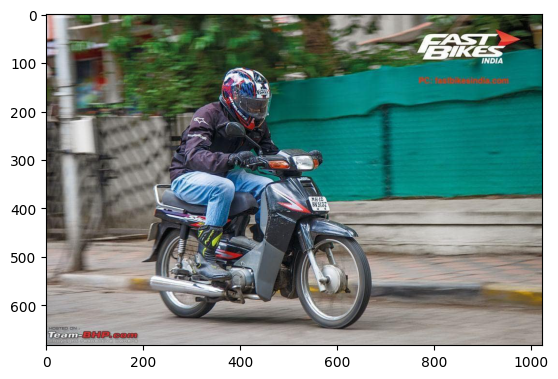

In [57]:
model_predict(image_path)

In [56]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def model_predict(image_path):
    try:
            i = cv2.imread(image_path)
            d = model2.predict(i)
            for result in d:
                boxes = result.boxes.xyxy
                scores = result.boxes.conf
                class_indices = result.boxes.cls
                labels = result.names
                image = result.orig_img
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

                # Define colors for bounding boxes
                colors = {index: (0, 255, 0) for index in range(len(labels))}

                for i in range(boxes.shape[0]):
                    box = boxes[i].cpu().numpy().astype(int)
                    score = scores[i].item()
                    class_index = int(class_indices[i].item())
                    class_name = labels[class_index]
                    pt1 = (box[0], box[1])
                    pt2 = (box[2], box[3])
                    color = colors.get(class_index, (255, 255, 255))
                    thickness = 2
                    image = cv2.rectangle(image, pt1, pt2, color, thickness)
                    label = f'{class_name} {score:.2f}'
                    image = cv2.putText(image, label, (pt1[0], pt1[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)

                cv2.imshow('Image with Bounding Boxes', image)
                cv2.waitKey(0)
                cv2.destroyAllWindows()
                return
